# Visualizations


In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from lightning.pytorch import seed_everything
from rl4co.data.transforms import StateAugmentation
from rl4co.utils.ops import gather_by_index, unbatchify

from routefinder.envs.mtvrp import MTVRPEnv
from routefinder.models import RouteFinderBase
from routefinder.models.baselines.mtpomo import MTPOMO
from routefinder.models.baselines.mvmoe import MVMoE

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# Set random seed
seed_everything(69420)



print("Loading MTPOMO...")
PATH = "../checkpoints/100/mtpomo.ckpt"
model_mtpomo = MTPOMO.load_from_checkpoint(PATH, map_location="cpu")
policy_mtpomo = model_mtpomo.policy.eval().to(device)

print("Loading MVMoE...")
PATH = "../checkpoints/100/mvmoe.ckpt"
model_mvmoe = MVMoE.load_from_checkpoint(PATH, map_location="cpu")
policy_mvmoe = model_mvmoe.policy.eval().to(device)

print("Loading RouteFinder-POMO...")
PATH = "../checkpoints/100/rf-pomo.ckpt"
model_rf_pomo = RouteFinderBase.load_from_checkpoint(PATH, map_location="cpu")
policy_rf_pomo = model_rf_pomo.policy.eval().to(device)

print("Loading RouteFinder-MoE...")
PATH = "../checkpoints/100/rf-moe.ckpt"
model_rf_moe = RouteFinderBase.load_from_checkpoint(PATH, map_location="cpu")
policy_rf_moe = model_rf_moe.policy.eval().to(device)

print("Loading RouteFinder-Transformer...")
PATH = "../checkpoints/100/rf-transformer.ckpt"
model_rf_te = RouteFinderBase.load_from_checkpoint(PATH, map_location="cpu")
policy_rf_te = model_rf_te.policy.eval().to(device)

/home/botu/Dev/routefinder/.venv/lib/python3.12/site-packages/torchrl/__init__.py:43: UserWarning: failed to set start method to spawn, and current start method for mp is fork.
  warn(
Seed set to 69420
/home/botu/Dev/routefinder/.venv/lib/python3.12/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'env' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['env'])`.
/home/botu/Dev/routefinder/.venv/lib/python3.12/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'policy' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['policy'])`.


Loading MTPOMO...


Provided file name ['data/cvrp/val/100.npz', 'data/ovrp/val/100.npz', 'data/ovrpb/val/100.npz', 'data/ovrpbl/val/100.npz', 'data/ovrpbltw/val/100.npz', 'data/ovrpbtw/val/100.npz', 'data/ovrpl/val/100.npz', 'data/ovrpltw/val/100.npz', 'data/ovrptw/val/100.npz', 'data/vrpb/val/100.npz', 'data/vrpl/val/100.npz', 'data/vrpbltw/val/100.npz', 'data/vrpbtw/val/100.npz', 'data/vrpbl/val/100.npz', 'data/vrpltw/val/100.npz', 'data/vrptw/val/100.npz', 'data/cvrp/val/50.npz', 'data/vrptw/val/50.npz'] not found. Make sure to provide a file in the right path first or unset val_file to generate data automatically instead
Provided file name ['data/cvrp/test/100.npz', 'data/ovrp/test/100.npz', 'data/ovrpb/test/100.npz', 'data/ovrpbl/test/100.npz', 'data/ovrpbltw/test/100.npz', 'data/ovrpbtw/test/100.npz', 'data/ovrpl/test/100.npz', 'data/ovrpltw/test/100.npz', 'data/ovrptw/test/100.npz', 'data/vrpb/test/100.npz', 'data/vrpl/test/100.npz', 'data/vrpbltw/test/100.npz', 'data/vrpbtw/test/100.npz', 'data/v

Loading MVMoE...


Provided file name ['data/cvrp/val/100.npz', 'data/ovrp/val/100.npz', 'data/ovrpb/val/100.npz', 'data/ovrpbl/val/100.npz', 'data/ovrpbltw/val/100.npz', 'data/ovrpbtw/val/100.npz', 'data/ovrpl/val/100.npz', 'data/ovrpltw/val/100.npz', 'data/ovrptw/val/100.npz', 'data/vrpb/val/100.npz', 'data/vrpl/val/100.npz', 'data/vrpbltw/val/100.npz', 'data/vrpbtw/val/100.npz', 'data/vrpbl/val/100.npz', 'data/vrpltw/val/100.npz', 'data/vrptw/val/100.npz', 'data/cvrp/val/50.npz', 'data/vrptw/val/50.npz'] not found. Make sure to provide a file in the right path first or unset val_file to generate data automatically instead
Provided file name ['data/cvrp/test/100.npz', 'data/ovrp/test/100.npz', 'data/ovrpb/test/100.npz', 'data/ovrpbl/test/100.npz', 'data/ovrpbltw/test/100.npz', 'data/ovrpbtw/test/100.npz', 'data/ovrpl/test/100.npz', 'data/ovrpltw/test/100.npz', 'data/ovrptw/test/100.npz', 'data/vrpb/test/100.npz', 'data/vrpl/test/100.npz', 'data/vrpbltw/test/100.npz', 'data/vrpbtw/test/100.npz', 'data/v

Loading RouteFinder-POMO...


Provided file name ['data/cvrp/val/100.npz', 'data/ovrp/val/100.npz', 'data/ovrpb/val/100.npz', 'data/ovrpbl/val/100.npz', 'data/ovrpbltw/val/100.npz', 'data/ovrpbtw/val/100.npz', 'data/ovrpl/val/100.npz', 'data/ovrpltw/val/100.npz', 'data/ovrptw/val/100.npz', 'data/vrpb/val/100.npz', 'data/vrpl/val/100.npz', 'data/vrpbltw/val/100.npz', 'data/vrpbtw/val/100.npz', 'data/vrpbl/val/100.npz', 'data/vrpltw/val/100.npz', 'data/vrptw/val/100.npz', 'data/cvrp/val/50.npz', 'data/vrptw/val/50.npz'] not found. Make sure to provide a file in the right path first or unset val_file to generate data automatically instead
Provided file name ['data/cvrp/test/100.npz', 'data/ovrp/test/100.npz', 'data/ovrpb/test/100.npz', 'data/ovrpbl/test/100.npz', 'data/ovrpbltw/test/100.npz', 'data/ovrpbtw/test/100.npz', 'data/ovrpl/test/100.npz', 'data/ovrpltw/test/100.npz', 'data/ovrptw/test/100.npz', 'data/vrpb/test/100.npz', 'data/vrpl/test/100.npz', 'data/vrpbltw/test/100.npz', 'data/vrpbtw/test/100.npz', 'data/v

Loading RouteFinder-MoE...


Provided file name ['data/cvrp/val/100.npz', 'data/ovrp/val/100.npz', 'data/ovrpb/val/100.npz', 'data/ovrpbl/val/100.npz', 'data/ovrpbltw/val/100.npz', 'data/ovrpbtw/val/100.npz', 'data/ovrpl/val/100.npz', 'data/ovrpltw/val/100.npz', 'data/ovrptw/val/100.npz', 'data/vrpb/val/100.npz', 'data/vrpl/val/100.npz', 'data/vrpbltw/val/100.npz', 'data/vrpbtw/val/100.npz', 'data/vrpbl/val/100.npz', 'data/vrpltw/val/100.npz', 'data/vrptw/val/100.npz', 'data/cvrp/val/50.npz', 'data/vrptw/val/50.npz'] not found. Make sure to provide a file in the right path first or unset val_file to generate data automatically instead
Provided file name ['data/cvrp/test/100.npz', 'data/ovrp/test/100.npz', 'data/ovrpb/test/100.npz', 'data/ovrpbl/test/100.npz', 'data/ovrpbltw/test/100.npz', 'data/ovrpbtw/test/100.npz', 'data/ovrpl/test/100.npz', 'data/ovrpltw/test/100.npz', 'data/ovrptw/test/100.npz', 'data/vrpb/test/100.npz', 'data/vrpl/test/100.npz', 'data/vrpbltw/test/100.npz', 'data/vrpbtw/test/100.npz', 'data/v

Loading RouteFinder-Transformer...


Provided file name ['data/cvrp/val/100.npz', 'data/ovrp/val/100.npz', 'data/ovrpb/val/100.npz', 'data/ovrpbl/val/100.npz', 'data/ovrpbltw/val/100.npz', 'data/ovrpbtw/val/100.npz', 'data/ovrpl/val/100.npz', 'data/ovrpltw/val/100.npz', 'data/ovrptw/val/100.npz', 'data/vrpb/val/100.npz', 'data/vrpl/val/100.npz', 'data/vrpbltw/val/100.npz', 'data/vrpbtw/val/100.npz', 'data/vrpbl/val/100.npz', 'data/vrpltw/val/100.npz', 'data/vrptw/val/100.npz', 'data/cvrp/val/50.npz', 'data/vrptw/val/50.npz'] not found. Make sure to provide a file in the right path first or unset val_file to generate data automatically instead
Provided file name ['data/cvrp/test/100.npz', 'data/ovrp/test/100.npz', 'data/ovrpb/test/100.npz', 'data/ovrpbl/test/100.npz', 'data/ovrpbltw/test/100.npz', 'data/ovrpbtw/test/100.npz', 'data/ovrpl/test/100.npz', 'data/ovrpltw/test/100.npz', 'data/ovrptw/test/100.npz', 'data/vrpb/test/100.npz', 'data/vrpl/test/100.npz', 'data/vrpbltw/test/100.npz', 'data/vrpbtw/test/100.npz', 'data/v

In [5]:
def test(
    policy,
    td,
    env,
    num_augment=8,
    augment_fn="dihedral8",  # or symmetric. Default is dihedral8 for reported eval
    num_starts=None,
    device="cuda",
):

    costs_bks = td.get("costs_bks", None)

    with torch.inference_mode():
        with (
            torch.amp.autocast("cuda")
            if "cuda" in str(device)
            else torch.inference_mode()
        ):  # Use mixed precision if supported
            n_start = env.get_num_starts(td) if num_starts is None else num_starts

            if num_augment > 1:
                td = StateAugmentation(num_augment=num_augment, augment_fn=augment_fn)(td)

            # Evaluate policy
            out = policy(td, env, phase="test", num_starts=n_start, return_actions=True)

            # Unbatchify reward to [batch_size, num_augment, num_starts].
            reward = unbatchify(out["reward"], (num_augment, n_start))

            if n_start > 1:
                # max multi-start reward
                max_reward, max_idxs = reward.max(dim=-1)
                out.update({"max_reward": max_reward})

                if out.get("actions", None) is not None:
                    # Reshape batch to [batch_size, num_augment, num_starts, ...]
                    actions = unbatchify(out["actions"], (num_augment, n_start))
                    out.update(
                        {
                            "best_multistart_actions": gather_by_index(
                                actions, max_idxs, dim=max_idxs.dim()
                            )
                        }
                    )
                    out["actions"] = actions

            # Get augmentation score only during inference
            if num_augment > 1:
                # If multistart is enabled, we use the best multistart rewards
                reward_ = max_reward if n_start > 1 else reward
                max_aug_reward, max_idxs = reward_.max(dim=1)
                out.update({"max_aug_reward": max_aug_reward})

                # If costs_bks is available, we calculate the gap to BKS
                if costs_bks is not None:
                    # note: torch.abs is here as a temporary fix, since we forgot to
                    # convert rewards to costs. Does not affect the results.
                    gap_to_bks = (
                        100
                        * (-max_aug_reward - torch.abs(costs_bks))
                        / torch.abs(costs_bks)
                    )
                    out.update({"gap_to_bks": gap_to_bks})

                if out.get("actions", None) is not None:
                    actions_ = (
                        out["best_multistart_actions"] if n_start > 1 else out["actions"]
                    )
                    out.update({"best_aug_actions": gather_by_index(actions_, max_idxs)})

            if out.get("gap_to_bks", None) is None:
                out.update({"gap_to_bks": 69420})  # Dummy value

            return out



In [6]:
from tqdm.auto import tqdm

from routefinder.data.utils import get_dataloader

variants = [
    "cvrp", "ovrp", "vrpb", "vrpl", "vrptw", "ovrptw", "ovrpb",
    "ovrpl", "vrpbl", "vrpbtw", "vrpltw", "ovrpbl", "ovrpbtw",
    "ovrpltw", "vrpbltw", "ovrpbltw"
]

size = 100
DATA_FORMAT = r"../data/{variant}/test/{size}.npz"
NUM_DATA = 30 # only the first 30 instances

results_mtpomo = {}
results_mvmoe = {}
results_rf_pomo = {}
results_rf_moe = {}
results_rf_te = {}

for variant in tqdm(variants):
    env = MTVRPEnv(check_solution=False)
    print(f"Testing {variant}...")
    td_test = env.load_data(DATA_FORMAT.format(size=size, variant=variant))
    dataloader = get_dataloader(td_test, batch_size=NUM_DATA)
    # for batch in dataloader:
    batch = next(iter(dataloader))
    td_test = env.reset(batch).to(device)
    results_mtpomo[variant] = test(policy_mtpomo, td_test, env, device=device)
    results_mvmoe[variant] = test(policy_mvmoe, td_test, env, device=device)
    results_rf_pomo[variant] = test(policy_rf_pomo, td_test, env, device=device)
    results_rf_moe[variant] = test(policy_rf_moe, td_test, env, device=device)
    results_rf_te[variant] = test(policy_rf_te, td_test, env, device=device)

    print(f"MTPOMO: {-results_mtpomo[variant]['max_aug_reward'].mean():.3f}, MVMoE: {-results_mvmoe[variant]['max_aug_reward'].mean():.3f}, RF-POMO: {-results_rf_pomo[variant]['max_aug_reward'].mean():.3f}, RF-MOE: {-results_rf_moe[variant]['max_aug_reward'].mean():.3f}, RF-TE: {-results_rf_te[variant]['max_aug_reward'].mean():.3f}")

  0%|          | 0/16 [00:00<?, ?it/s]

Testing cvrp...


  6%|▋         | 1/16 [00:04<01:03,  4.24s/it]

MTPOMO: 16.409, MVMoE: 16.389, RF-POMO: 16.404, RF-MOE: 16.362, RF-TE: 16.361
Testing ovrp...


 12%|█▎        | 2/16 [00:07<00:52,  3.77s/it]

MTPOMO: 10.464, MVMoE: 10.410, RF-POMO: 10.429, RF-MOE: 10.370, RF-TE: 10.358
Testing vrpb...


 19%|█▉        | 3/16 [00:11<00:47,  3.62s/it]

MTPOMO: 15.471, MVMoE: 15.401, RF-POMO: 15.420, RF-MOE: 15.390, RF-TE: 15.363
Testing vrpl...


 25%|██▌       | 4/16 [00:14<00:42,  3.55s/it]

MTPOMO: 16.577, MVMoE: 16.522, RF-POMO: 16.574, RF-MOE: 16.526, RF-TE: 16.515
Testing vrptw...


 31%|███▏      | 5/16 [00:18<00:39,  3.60s/it]

MTPOMO: 27.563, MVMoE: 27.539, RF-POMO: 27.462, RF-MOE: 27.392, RF-TE: 27.324
Testing ovrptw...


 38%|███▊      | 6/16 [00:22<00:36,  3.70s/it]

MTPOMO: 18.082, MVMoE: 18.038, RF-POMO: 18.040, RF-MOE: 18.024, RF-TE: 17.993
Testing ovrpb...


 44%|████▍     | 7/16 [00:25<00:32,  3.62s/it]

MTPOMO: 11.141, MVMoE: 11.070, RF-POMO: 11.068, RF-MOE: 11.069, RF-TE: 11.018
Testing ovrpl...


 50%|█████     | 8/16 [00:29<00:28,  3.59s/it]

MTPOMO: 10.472, MVMoE: 10.432, RF-POMO: 10.429, RF-MOE: 10.374, RF-TE: 10.356
Testing vrpbl...


 56%|█████▋    | 9/16 [00:32<00:24,  3.55s/it]

MTPOMO: 16.110, MVMoE: 16.049, RF-POMO: 16.068, RF-MOE: 15.976, RF-TE: 15.946
Testing vrpbtw...


 62%|██████▎   | 10/16 [00:36<00:21,  3.63s/it]

MTPOMO: 31.811, MVMoE: 31.864, RF-POMO: 31.718, RF-MOE: 31.686, RF-TE: 31.669
Testing vrpltw...


 69%|██████▉   | 11/16 [00:40<00:18,  3.69s/it]

MTPOMO: 28.099, MVMoE: 28.060, RF-POMO: 27.954, RF-MOE: 27.904, RF-TE: 27.782
Testing ovrpbl...


 75%|███████▌  | 12/16 [00:43<00:14,  3.66s/it]

MTPOMO: 11.138, MVMoE: 11.067, RF-POMO: 11.055, RF-MOE: 11.070, RF-TE: 11.024
Testing ovrpbtw...


 81%|████████▏ | 13/16 [00:47<00:11,  3.76s/it]

MTPOMO: 20.340, MVMoE: 20.315, RF-POMO: 20.327, RF-MOE: 20.310, RF-TE: 20.285
Testing ovrpltw...


 88%|████████▊ | 14/16 [00:51<00:07,  3.81s/it]

MTPOMO: 18.079, MVMoE: 18.076, RF-POMO: 18.049, RF-MOE: 18.030, RF-TE: 17.984
Testing vrpbltw...


 94%|█████████▍| 15/16 [00:55<00:03,  3.84s/it]

MTPOMO: 32.184, MVMoE: 32.122, RF-POMO: 32.172, RF-MOE: 32.152, RF-TE: 31.984
Testing ovrpbltw...


100%|██████████| 16/16 [00:59<00:00,  3.73s/it]

MTPOMO: 20.344, MVMoE: 20.332, RF-POMO: 20.320, RF-MOE: 20.329, RF-TE: 20.262


### Plots

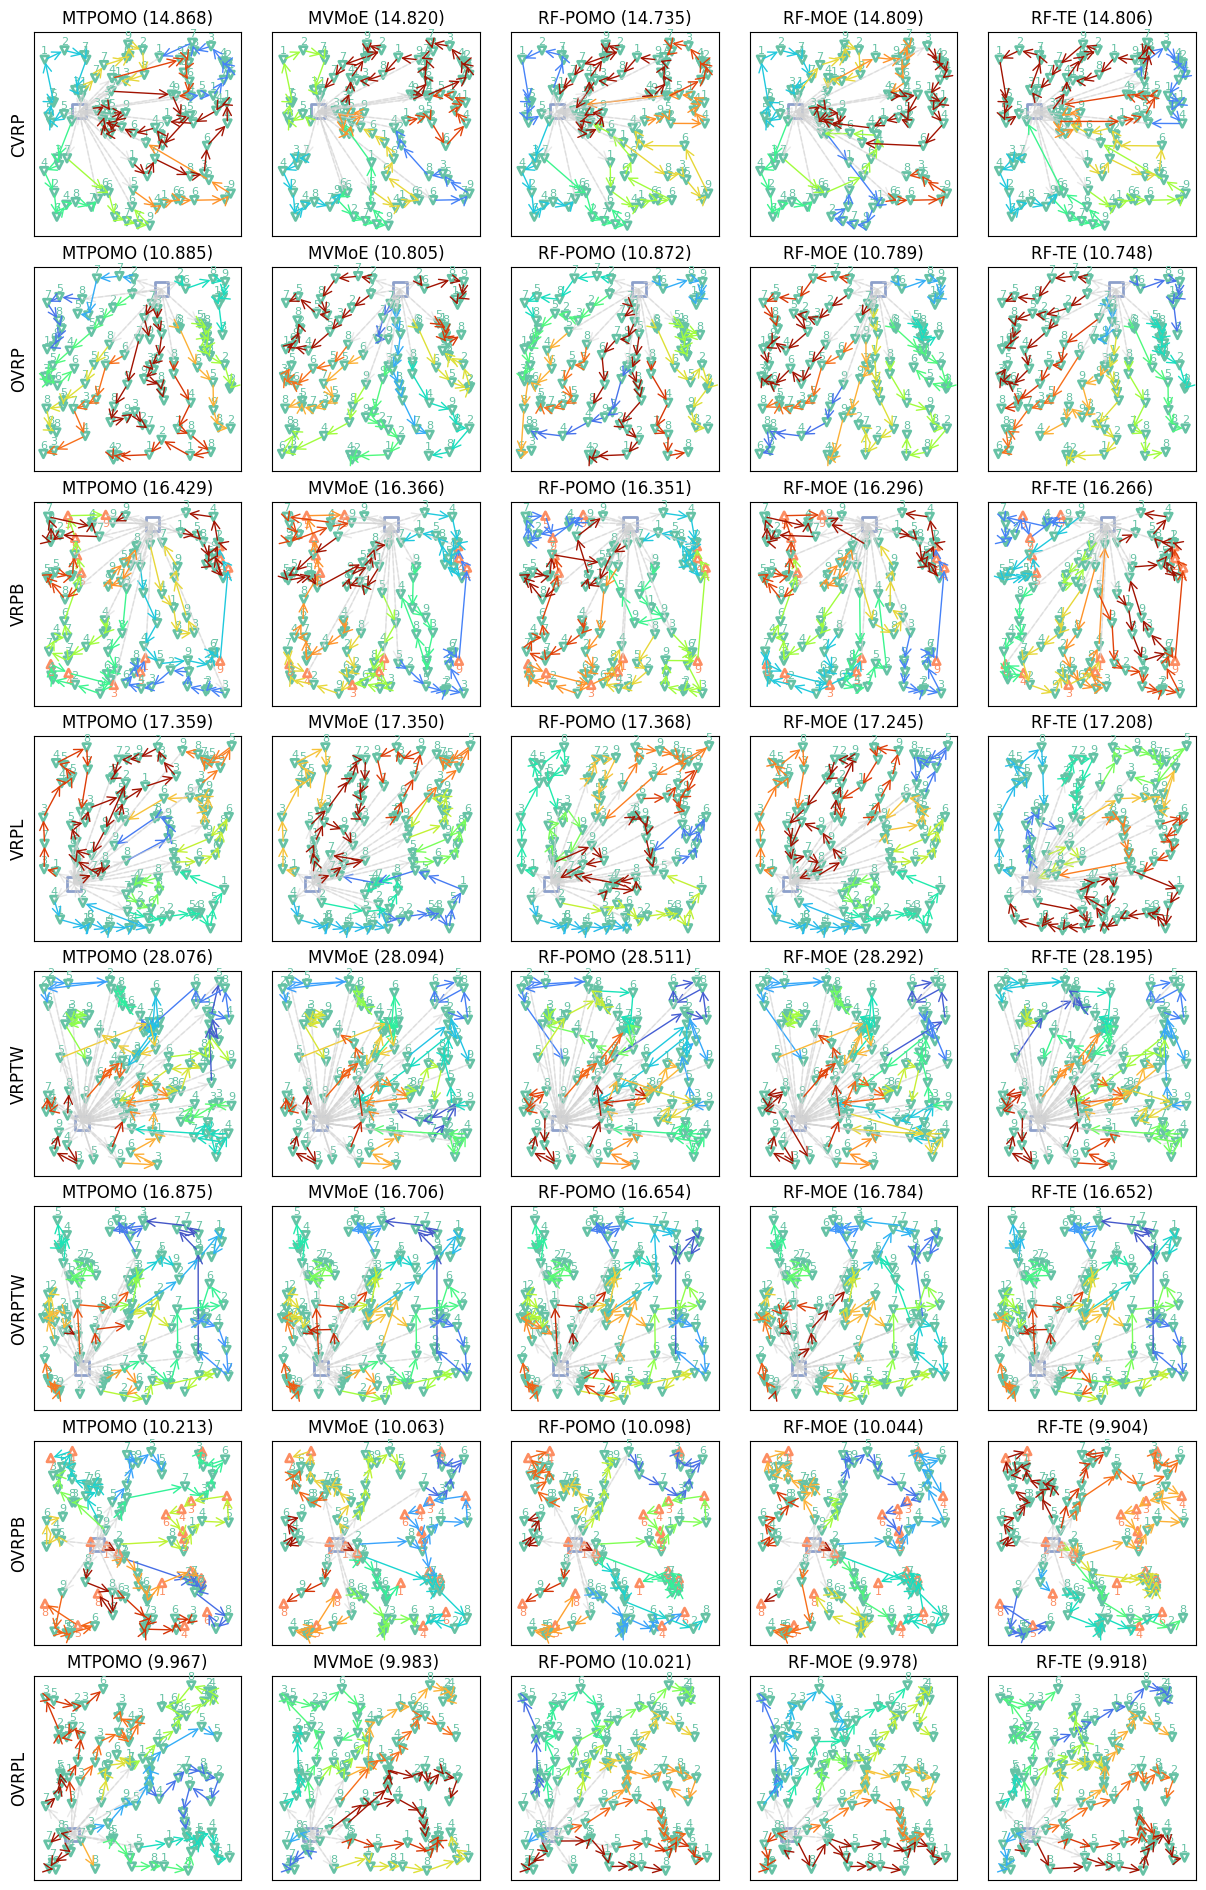

In [25]:

td_tests = {}

BASE_SIZE = 3

VARIANTS_PLOT = variants[:8]
index_per_variant = np.arange(NUM_DATA) # for CVRP we plot data point 0, then for OVRP we plot data point 1, etc.
# we do this because the first index for each variant is actually the same instance with different attributes on
# top. Note that we are not cherry picking
FONTSIZE = 8


for variant in VARIANTS_PLOT:
    env = MTVRPEnv(check_solution=False)
    td_test = env.load_data(DATA_FORMAT.format(size=size, variant=variant))
    dataloader = get_dataloader(td_test, batch_size=NUM_DATA)
    batch = next(iter(dataloader))
    td_test = env.reset(batch).to(device)
    td_tests[variant] = td_test


model_names = [
    ("MTPOMO", results_mtpomo),
    ("MVMoE", results_mvmoe),
    ("RF-POMO", results_rf_pomo),
    ("RF-MOE", results_rf_moe),
    ("RF-TE", results_rf_te),
]


fig, axes = plt.subplots(len(VARIANTS_PLOT), len(model_names),
                         figsize=(BASE_SIZE * len(model_names), BASE_SIZE * len(VARIANTS_PLOT)),
                         gridspec_kw={'wspace': 0.15, 'hspace': 0.15}
                        )

for row, variant in enumerate(VARIANTS_PLOT):
    td = td_tests[variant]
    idx = index_per_variant[row]
    for col, (model_name, results_dict) in enumerate(model_names):
        ax = axes[row, col]
        # Get actions for index 0
        if "best_aug_actions" in results_dict[variant]:
            actions = results_dict[variant]["best_aug_actions"][idx]
        else:
            actions = results_dict[variant]["actions"][idx]

        # Use the new render function with return_ax=True
        MTVRPEnv.render(td[idx].cpu(), actions=actions.cpu(), ax=ax, return_ax=True, fontsize=FONTSIZE)

        # if row == 0:
        #     ax.set_title(model_name)
        ax.set_title(f"{model_name} ({-results_dict[variant]["max_aug_reward"][idx].item():.3f})")
        if col == 0:
            ax.set_ylabel(variant.upper(), fontsize=12)

# plt.tight_layout()
plt.savefig("routefinder_visualizations_first_8.pdf", bbox_inches="tight")
plt.show()

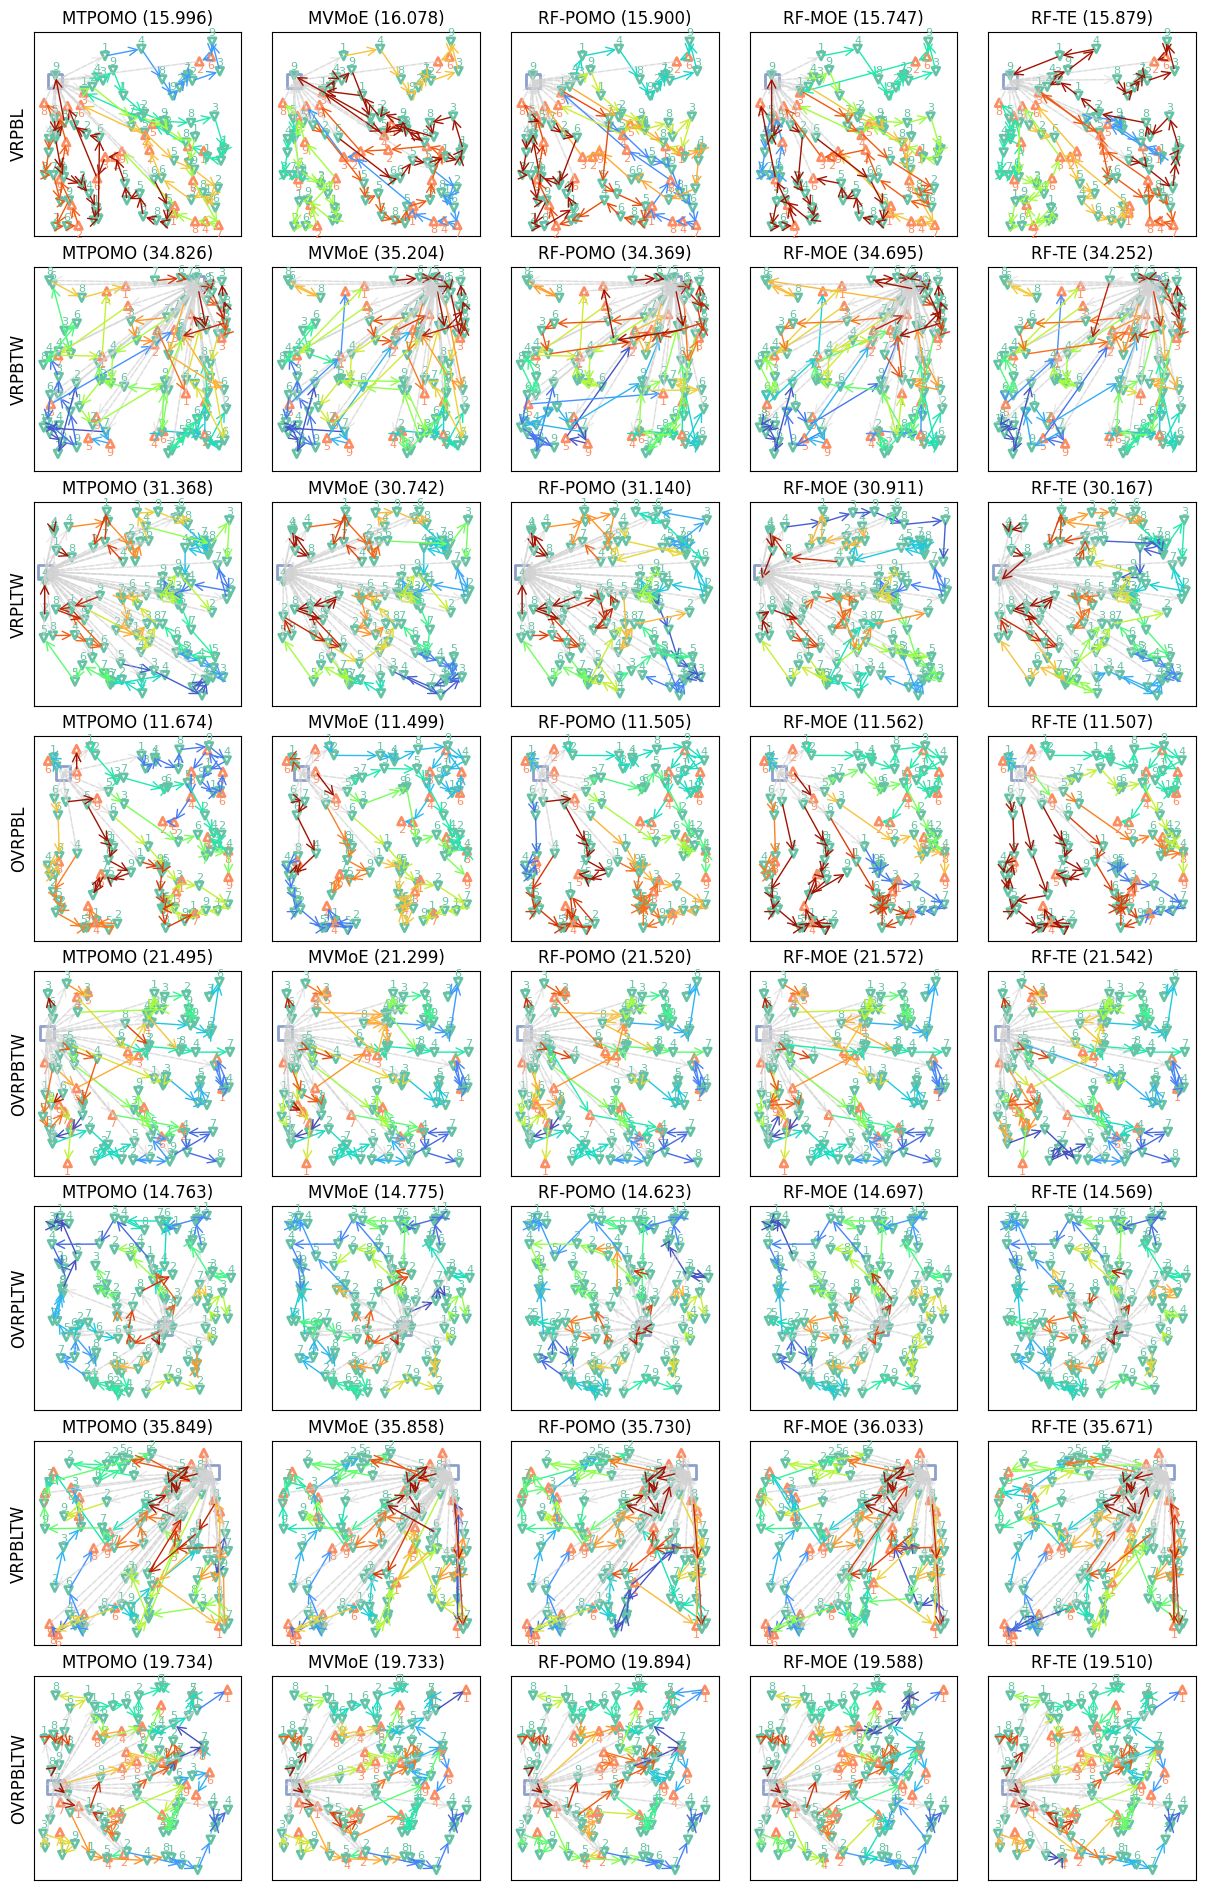

In [26]:
import matplotlib.pyplot as plt

td_tests = {}

BASE_SIZE = 3

VARIANTS_PLOT = variants[8:]
FONTSIZE = 8
index_per_variant = np.arange(NUM_DATA) + 8 # for CVRP we plot data point 0, then for OVRP we plot data point 1, etc.



for variant in VARIANTS_PLOT:
    env = MTVRPEnv(check_solution=False)
    td_test = env.load_data(DATA_FORMAT.format(size=size, variant=variant))
    dataloader = get_dataloader(td_test, batch_size=NUM_DATA)
    batch = next(iter(dataloader))
    td_test = env.reset(batch).to(device)
    td_tests[variant] = td_test


model_names = [
    ("MTPOMO", results_mtpomo),
    ("MVMoE", results_mvmoe),
    ("RF-POMO", results_rf_pomo),
    ("RF-MOE", results_rf_moe),
    ("RF-TE", results_rf_te),
]


fig, axes = plt.subplots(len(VARIANTS_PLOT), len(model_names),
                         figsize=(BASE_SIZE * len(model_names), BASE_SIZE * len(VARIANTS_PLOT)),
                         gridspec_kw={'wspace': 0.15, 'hspace': 0.15}
                        )

for row, variant in enumerate(VARIANTS_PLOT):
    td = td_tests[variant]
    idx = index_per_variant[row]
    for col, (model_name, results_dict) in enumerate(model_names):
        ax = axes[row, col]
        # Get actions for index 0
        if "best_aug_actions" in results_dict[variant]:
            actions = results_dict[variant]["best_aug_actions"][idx]
        else:
            actions = results_dict[variant]["actions"][idx]

        # Use the new render function with return_ax=True
        MTVRPEnv.render(td[idx].cpu(), actions=actions.cpu(), ax=ax, return_ax=True, fontsize=FONTSIZE)

        # if row == 0:
        #     ax.set_title(model_name)
        ax.set_title(f"{model_name} ({-results_dict[variant]["max_aug_reward"][idx].item():.3f})")
        if col == 0:
            ax.set_ylabel(variant.upper(), fontsize=12)

# plt.tight_layout()
plt.savefig("routefinder_visualizations_last_8.pdf", bbox_inches="tight")
plt.show()